In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


There are 918 values in each column and shape of df is also 918. So there are no missing values.

Next we can see that columns `Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina` and `ST_Slope` are having `object` datatypes, that means they are categorical attributes and thus we need to encode them using `OneHotEncoder` and will need a pipeline also.

Let's try to find out uniques values for these `object` datatypes.

In [5]:
df["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [6]:
df["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [7]:
df["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [8]:
df["ExerciseAngina"].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [9]:
df["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

## understanding the data

- ChestPainType : TA = Typical Angina, ATA = Atypical Angina, NAP = Non-Anginal Pain, ASY = Asymptomatic
  - TA means chest pain related decrease blood supply to the heart
  - ATA means chest pain not related to heart
  - NAP means not related to heart issues
  - ASY means no chest pain

- restingbp: mm Hg (unit)
- cholesterol: mg/dl (unit)
- fastingBs: (1 = fasting blood sugar is greater than 120 mg/dl, 0 = otherwise).
- RestingECG: Resting electrocardiographic results
  - Normal = normal
  - ST = having ST-T wave abnormality
  - LVH = showing probable or definite left ventricular hypertrophy
- MaxHR: max heart rate achieved
- ExerciseAngina: (Y = yes; N = no): Exercise-induced angina (chest pain). This is chest pain due to lack of blood supply to the heart due to physical activity.
- Oldpeak: ST depression induced by exercise relative to rest [Numeric value measured in depression]
- ST_Slope = slope of peak exercise ST Segment [Up: upslopping, Flat: flat, Down: downslopping]
- HearDisease = output class [1: heart disease, 0: Normal]

### Stats about Data

In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Plotting Histogram

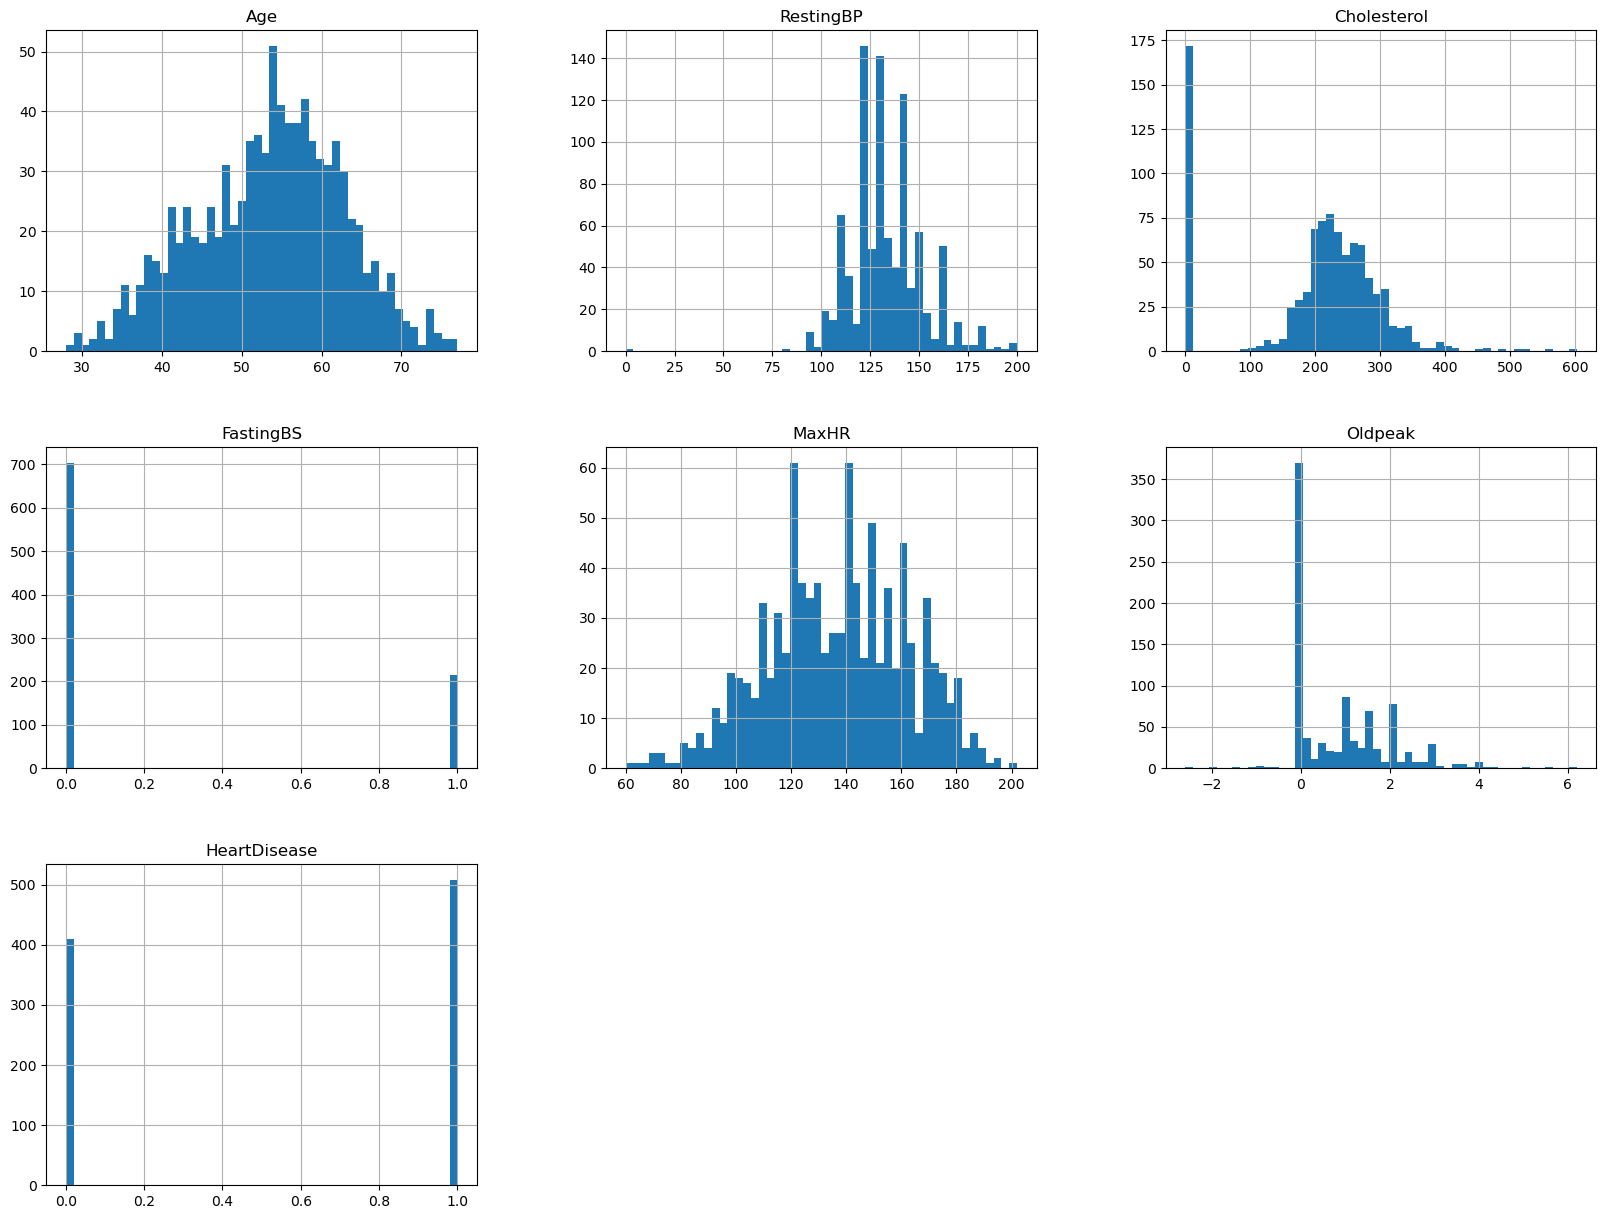

In [11]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20, 15))
plt.show()

### Train test split

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [13]:
train_set.shape, test_set.shape

((734, 12), (184, 12))

In [14]:
train_set.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
795,42,M,NAP,120,240,1,Normal,194,N,0.8,Down,0
25,36,M,NAP,130,209,0,Normal,178,N,0.0,Up,0
84,56,M,ASY,150,213,1,Normal,125,Y,1.0,Flat,1
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0
344,51,M,ASY,120,0,1,Normal,104,N,0.0,Flat,1


### More data visualizations

In [15]:
corr_mat = train_set.corr(numeric_only=True)
corr_mat

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.282245,-0.102452,0.213311,-0.386743,0.288749,0.299410
RestingBP,0.282245,1.000000,0.072624,0.079418,-0.137316,0.173900,0.138611
Cholesterol,-0.102452,0.072624,1.000000,-0.272745,0.248506,0.049840,-0.251893
FastingBS,0.213311,0.079418,-0.272745,1.000000,-0.141972,0.042815,0.259565
MaxHR,-0.386743,-0.137316,0.248506,-0.141972,1.000000,-0.174141,-0.414676
Oldpeak,0.288749,0.173900,0.049840,0.042815,-0.174141,1.000000,0.422740
HeartDisease,0.299410,0.138611,-0.251893,0.259565,-0.414676,0.422740,1.000000


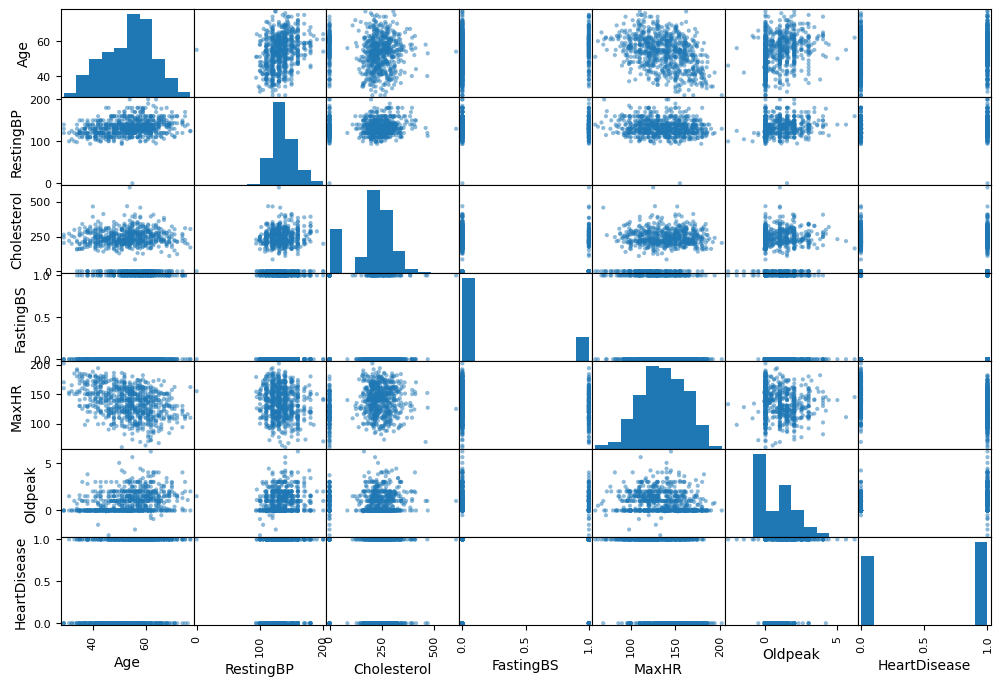

In [16]:
pd.plotting.scatter_matrix(train_set, figsize=(12, 8))
plt.show()

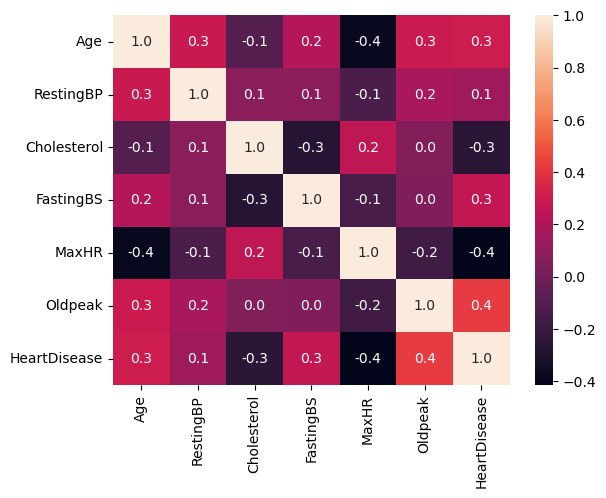

In [17]:
import seaborn as sns

sns.heatmap(corr_mat, annot=True, fmt=".1f")
plt.show()

RestingBP is not much correlated to output varibale.

TODO: later try removing this variabe and train the whole model again

In [18]:
corr_mat["HeartDisease"].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.422740
Age             0.299410
FastingBS       0.259565
RestingBP       0.138611
Cholesterol    -0.251893
MaxHR          -0.414676
Name: HeartDisease, dtype: float64

Oldpeak and MaxHr seems to be correlated to output variable. Not much but as compared to other variables, they are more correlated.

In [19]:
# count of patients with heart disease
train_set["HeartDisease"].value_counts() / len(train_set) * 100

1    54.632153
0    45.367847
Name: HeartDisease, dtype: float64

Our dataset contains 54% of heart disease cases and 46% of normal cases. So it is a balanced dataset.

In [20]:
train_set.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
795,42,M,NAP,120,240,1,Normal,194,N,0.8,Down,0
25,36,M,NAP,130,209,0,Normal,178,N,0.0,Up,0
84,56,M,ASY,150,213,1,Normal,125,Y,1.0,Flat,1
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0
344,51,M,ASY,120,0,1,Normal,104,N,0.0,Flat,1


Draft (how to proceed with EDA):

- Planning to bifercate ages in groups and then plot the distribution of heart disease in each group. (DONE)
- Planning to see how gender is related to heart disease.
- Planning to see how which chest pain type is more related to heart disease and what is the distribution of chest pain type in heart disease cases.
- Plot RestingBP to see how it is values are distributed. But it is not much correlated to output variable. So we can ignore this variable. But still we can plot it.
- Plot Cholesterol to see how it is values are distributed. 
- Plot FastingBS to see how it is values are distributed and relared to output variable.
- Plot RestingECG to see how it is values are distributed and relared to output variable.
- Plot MaxHR to see its distibution
- Plot ExerciseAngina to see its distribution and relation with output variable.
- Plot Oldpeak to see its distribution and relation with output variable.
- Plot ST_Slope to see its distribution and relation with output variable.

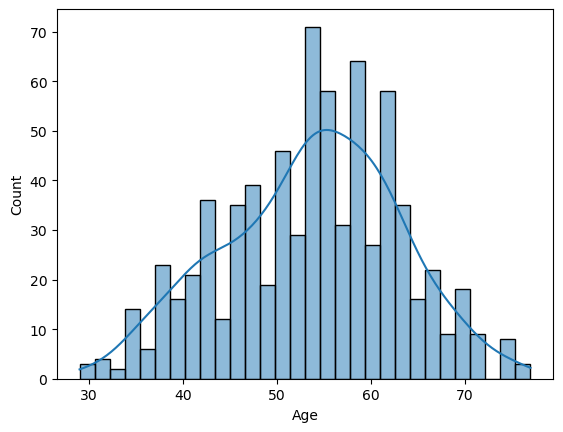

In [21]:
sns.histplot(train_set, x="Age", bins=30, kde=True)
plt.show()

#### let's create age categories

In [22]:
train_set["Age"].min(), train_set["Age"].max()

(29, 77)

age is starting from 29 and ending at 77. We can create 3 age groups: 20-39, 40-59, 60-80. We'll name them as Young, Middle and Old.

In [23]:
train_set1 = train_set.copy()

In [24]:
train_set1["Age_Cat"] = pd.cut(train_set1["Age"], bins=[20, 40,  60, 80], labels=["Young", "Middle", "Old"], right=False) # right=False means that the interval is left-closed, right-open, i.e., does not include the rightmost value

In [25]:
train_set1["Age_Cat"].value_counts()

Middle    468
Old       205
Young      61
Name: Age_Cat, dtype: int64

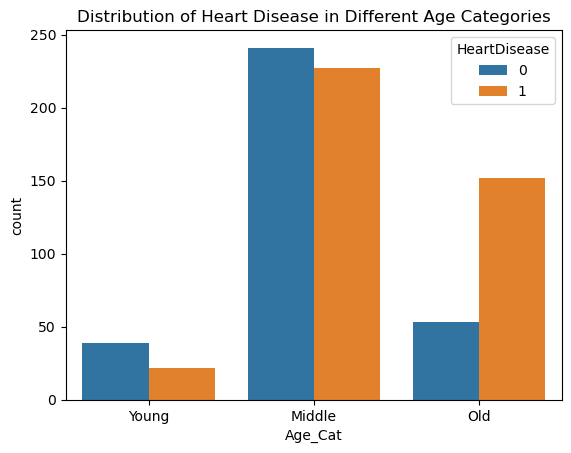

In [26]:
# plotting the distribution of heart disease in different age categories
sns.countplot(data=train_set1, x="Age_Cat", hue="HeartDisease")
plt.title("Distribution of Heart Disease in Different Age Categories")
plt.show()

We can see that heart disease is more in Middle age group but number of normal cases are also more in Middle age group. So we can't say that Middle age group is more prone to heart disease. Whereas in Old age group, heart disease cases are more as compared to normal cases. So we can say that Old age group is more prone to heart disease.

Gender and its relation with heart disease:

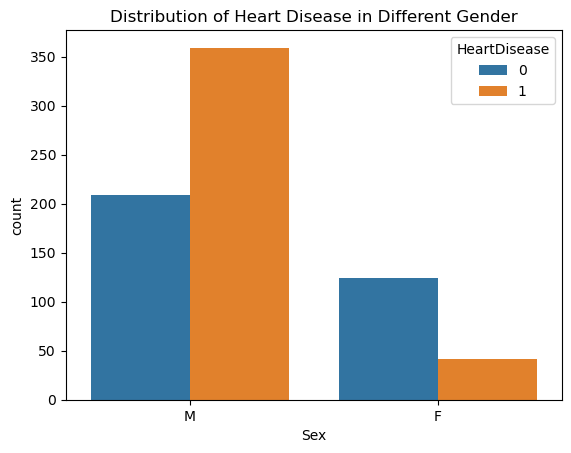

In [27]:
sns.countplot(data=train_set1, x="Sex", hue="HeartDisease")
plt.title("Distribution of Heart Disease in Different Gender")
plt.show()

We can see that our dataset contains more Male cases as compared Female cases. But if we see the distribution of heart disease cases Male has more heart disease cases as compared female. So we can say that Male are more prone to heart disease as compared to Female.

/home/dell/anaconda3/envs/latest/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


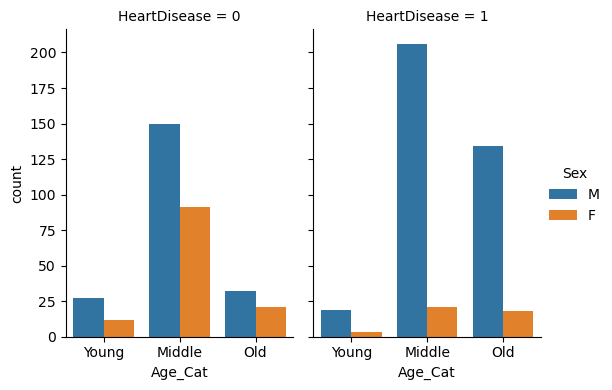

In [28]:
sns.catplot(data=train_set1, x="Age_Cat", hue="Sex", col="HeartDisease", kind="count", height=4, aspect=.7)
plt.show()

The analysis that we did above is confirmed by the combined plot of age categories and its relation to gender and heart disease. We can see that in Middle age group man has more heart disease cases as compared to females. 
Also old man has more heart disease cases as compared to females.

Thus in short: Middle and Old age man are more prone to heart disease.

now it's time to take up the "chest pain type" and its relation with heart disease.

In [29]:
train_set1["ChestPainType"].value_counts()

ASY    401
NAP    162
ATA    139
TA      32
Name: ChestPainType, dtype: int64

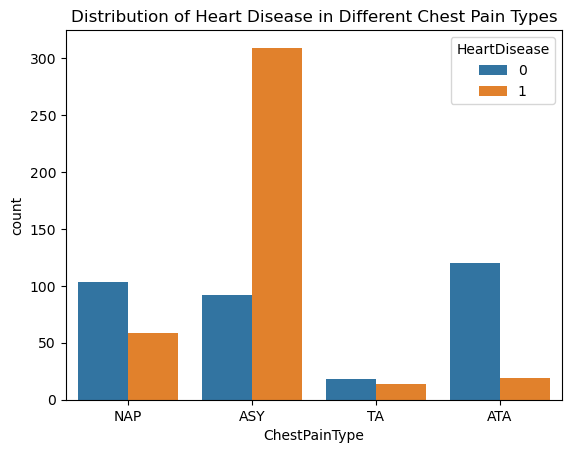

In [30]:
sns.countplot(data=train_set1, x="ChestPainType", hue="HeartDisease")
plt.title("Distribution of Heart Disease in Different Chest Pain Types")
plt.show()

We can see that in all the chest pain types, ASY (Asymptomatic) has more heart disease cases as compared to normal cases. So we can say that ASY chest pain type is more prone to heart disease. Also Male count is more dataset as compared to females. So we can say that ASY chest pain type is more prone to males and also it is more prone to heart disease.

In short: ASY chest pain type is more prone to heart disease.

now let's tackle RestingBP. Though it is not much correlated to output variable but still we can see its distribution.

In [31]:
train_set1["RestingBP"].min(), train_set1["RestingBP"].max()

(0, 200)

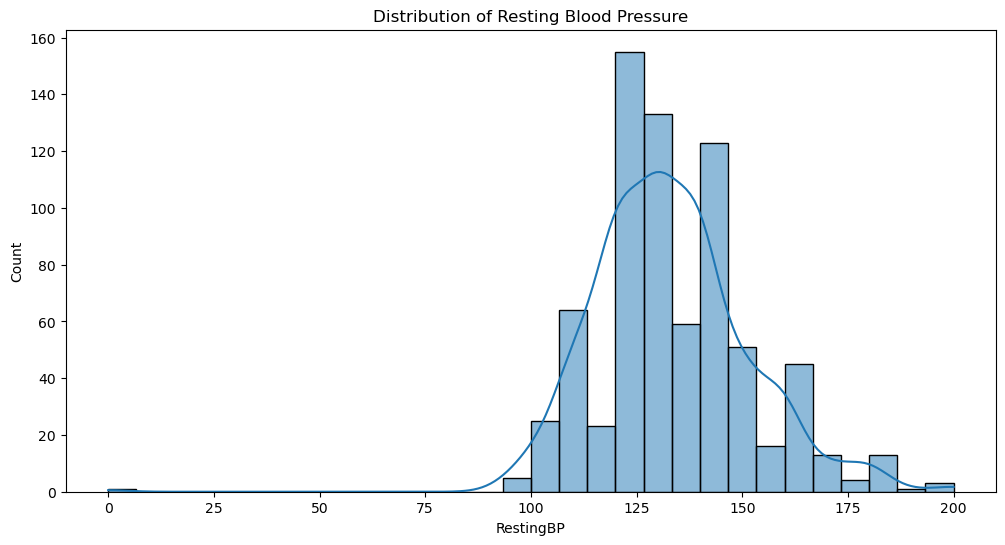

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(data=train_set1, x="RestingBP", bins=30, kde=True)
plt.title("Distribution of Resting Blood Pressure")
plt.show()

let's divide the resting bp into following categories:
- 0-80: Low
- 80-120: Normal
- 120-140: Prehypertension
- 140-160: High BP-1
- 160-180: High BP-2
- 180-above: Hypertensive Crisis

In [33]:
train_set1["RestingBP_Cat"] = pd.cut(train_set1["RestingBP"], bins=[0,80, 120, 140, 160, 180, 200], labels=["Low", "Normal", "PreHypertenstion", "High BP-1", "High BP-2", "Hypertensive Crisis"], right=False)

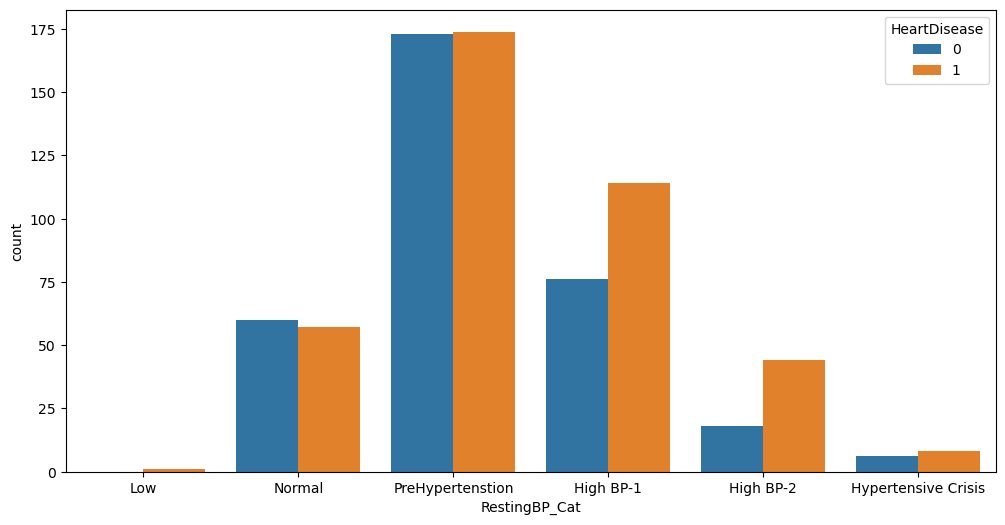

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_set1, x="RestingBP_Cat", hue="HeartDisease")
plt.show()

We can say that BP = 0 and BP > 140 are more prone to heart disease.

/home/dell/anaconda3/envs/latest/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


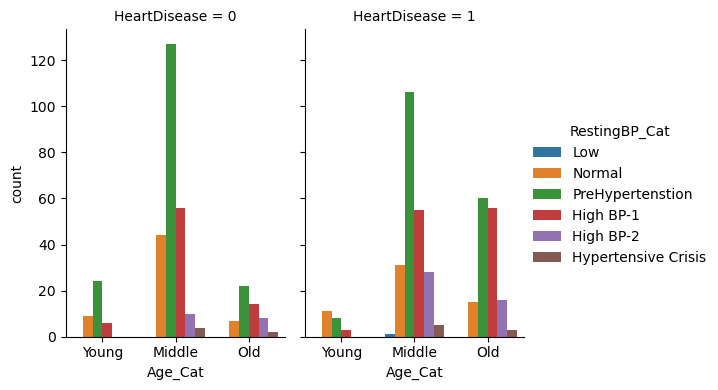

In [35]:
sns.catplot(data=train_set1, x="Age_Cat", hue="RestingBP_Cat", col="HeartDisease", kind="count", height=4, aspect=.7)
plt.show()

let's tackle cholestrol

In [36]:
train_set1["Cholesterol"].min(), train_set1["Cholesterol"].max()

(0, 603)

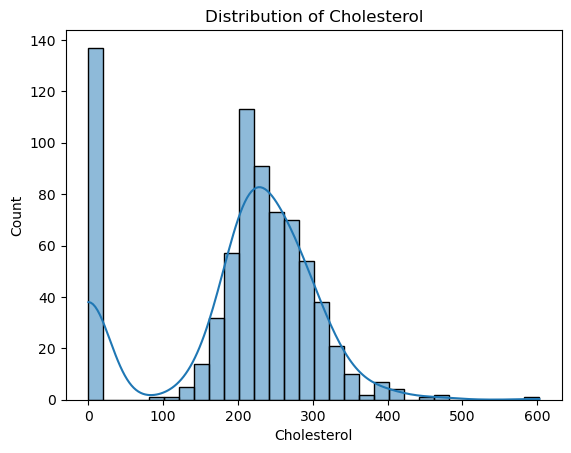

In [37]:
sns.histplot(data=train_set1, x="Cholesterol", bins=30, kde=True)
plt.title("Distribution of Cholesterol")
plt.show()

There are many 0 values in cholesterol. We can't say that cholesterol = 0 is a valid value. So we need a way to impute these values. Since we have only 918 values, we can't afford to drop these values. So we can impute these values with mean or median or we can even try KNN imputer.

Mean and Median won't work because they will give us a value which is not present in the dataset. So we can try KNN imputer.

#### Imputing the error values in cholesterol

In [38]:
train_set1[train_set1["Cholesterol"] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_Cat,RestingBP_Cat
344,51,M,ASY,120,0,1,Normal,104,N,0.0,Flat,1,Middle,PreHypertenstion
398,52,M,ASY,165,0,1,Normal,122,Y,1.0,Up,1,Middle,High BP-2
300,60,M,ASY,160,0,1,Normal,149,N,0.4,Flat,1,Old,High BP-2
326,45,M,NAP,110,0,0,Normal,138,N,-0.1,Up,0,Middle,Normal
430,57,M,ASY,128,0,1,ST,148,Y,1.0,Flat,1,Middle,PreHypertenstion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,63,M,ASY,185,0,0,Normal,98,Y,0.0,Up,1,Old,Hypertensive Crisis
458,61,M,ASY,134,0,1,ST,86,N,1.5,Flat,1,Old,PreHypertenstion
330,60,M,NAP,115,0,1,Normal,143,N,2.4,Up,1,Old,Normal
466,55,M,NAP,120,0,0,ST,125,Y,2.5,Flat,1,Middle,PreHypertenstion


In [39]:
train_set1[train_set1["Cholesterol"] == 0]["HeartDisease"].value_counts()

1    121
0     16
Name: HeartDisease, dtype: int64

Most patients having cholestrol 0 are heart patients. So we can't drop these values.

In [40]:
train_set1[train_set1["Cholesterol"] == 0]["RestingBP_Cat"].value_counts()

PreHypertenstion       58
Normal                 32
High BP-1              28
High BP-2              13
Hypertensive Crisis     3
Low                     1
Name: RestingBP_Cat, dtype: int64

In [41]:
temp = train_set1[train_set1["Cholesterol"] != 0]

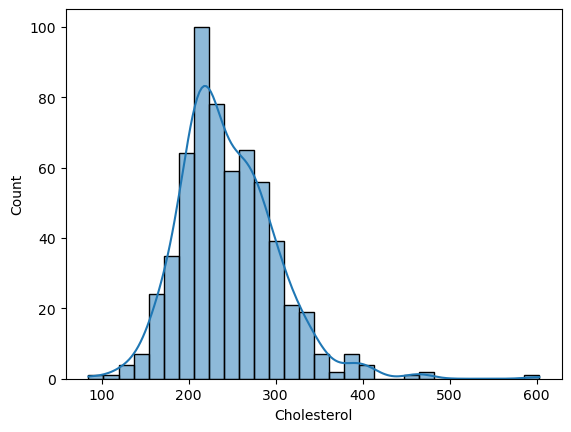

In [42]:
sns.histplot(data=temp, x="Cholesterol", bins=30, kde=True)
plt.show()

In [43]:
corr_temp = temp.corr(numeric_only=True)
corr_temp["Cholesterol"].sort_values(ascending=False)

Cholesterol     1.000000
RestingBP       0.106593
HeartDisease    0.082625
Oldpeak         0.078095
FastingBS       0.057250
Age             0.053448
MaxHR          -0.036873
Name: Cholesterol, dtype: float64

resting bp is most correlated to the cholesterol.

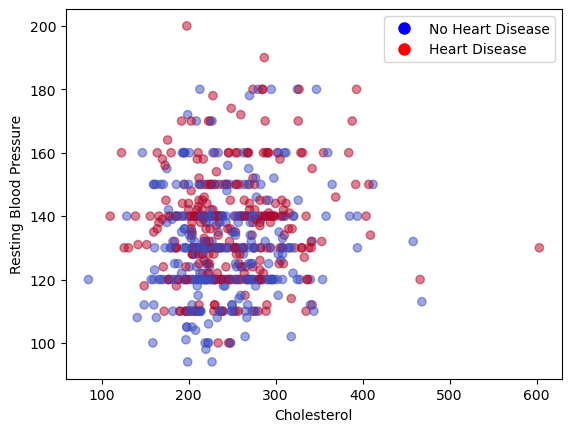

In [44]:
plt.scatter(data=temp, x="Cholesterol", y="RestingBP", c="HeartDisease", cmap="coolwarm", label="Heart Disease", alpha=0.5)
plt.xlabel("Cholesterol")
plt.ylabel("Resting Blood Pressure")

# Creating custom legend handles and labels with corresponding colors
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label='No Heart Disease', markerfacecolor='blue', markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w', label='Heart Disease', markerfacecolor='red', markersize=10)]

# Adding legend
plt.legend(handles=legend_handles)

# Adding legend
plt.legend(handles=legend_handles)
plt.show()

but resting bp is very much randomly distributed with respect to heart disease. So we can't use resting bp to impute cholesterol.

What I was thinking that:

122 people have cholesterol = 0 and 121 of them are heart patients. So let's impute those 121 values with the median of the heart patients and rest of the values with median of the normal patients.

In [45]:
train_set2 = train_set1.copy()

In [46]:
temp[temp["HeartDisease"] == 1]["Cholesterol"].median()

244.5

Median would not necessarily mean that it will work what works best is KNN imputer.

##### KNN Imputer

let's create one sep df for cholesterol and then try to impute the values using KNN imputer.

we will need to use whole db to fill the 0 cholestrol values. Then we can split the data into train and test and then train the model.

In [47]:
# chole_df = temp.copy()
chole_df = df.copy()

In [48]:
chole_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [49]:
chole_df.shape

(918, 12)

In [50]:
# drop all categorical columns
chole_df1 = chole_df.copy()

In [51]:
# drop all categorical columns
cat_cols = chole_df1.select_dtypes(include=["object"]).columns.values

chole_df2 = chole_df1.drop(cat_cols, axis=1)
chole_df2.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


We will train model on the data where cholesterol is not 0 and then predict the values where cholesterol is 0. 
So test set will be the data where cholesterol is 0 and train set will be the data where cholesterol is not 0.

we need to fill the whole dataset's cholesterol values. So we can't split the data into train and test.

In [52]:
# chole_train_set = chole_df2.copy()

# chole_train_x = chole_train_set.drop("Cholesterol", axis=1)
# chole_train_y = chole_train_set["Cholesterol"]

chole_train_set = chole_df[chole_df["Cholesterol"] != 0]
chole_test_set = chole_df[chole_df["Cholesterol"] == 0]


In [53]:
# chole_train_x.head()
chole_train_set.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [54]:
chole_test_set.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1


In [55]:
# chole_train_x.shape, chole_train_y.shape
chole_train_set.shape, chole_train_set.shape

((746, 12), (746, 12))

In [56]:
# remove categorical columns from both train and test sets
cat_cols = chole_train_set.select_dtypes(include=["object"]).columns.values

chole_train_set_num = chole_train_set.drop(cat_cols, axis=1)
chole_test_set_num = chole_test_set.drop(cat_cols, axis=1)

In [57]:
chole_train_set_num.shape, chole_test_set_num.shape

((746, 7), (172, 7))

In [58]:
chole_train_set_num_x = chole_train_set_num.drop("Cholesterol", axis=1)
chole_train_set_num_y = chole_train_set_num["Cholesterol"]

chole_train_set_num_x.shape, chole_train_set_num_y.shape

((746, 6), (746,))

In [59]:
chole_test_set_num_x = chole_test_set_num.drop("Cholesterol", axis=1)
chole_test_set_num_y = chole_test_set_num["Cholesterol"] # this contains only zeros and this is what we want to predict

In [60]:
# test_cols = chole_train_set.columns.values 
# chole_test_set = df[test_cols]
# chole_test_set = chole_test_set[chole_test_set["Cholesterol"] == 0]
# chole_test_set

In [61]:
# chole_test_x = chole_test_set.drop(["Cholesterol"], axis=1)
# chole_test_x.head()

In [62]:
# chole_test_x.shape

now we have train set and test set, so let's predict the values where cholesterol is 0.

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# chole_train_x_scaled = scaler.fit_transform(chole_train_x)
# chole_test_x_scaled = scaler.fit_transform(chole_test_x)

chole_train_x_scaled = scaler.fit_transform(chole_train_set_num_x)
chole_test_x_scaled = scaler.fit_transform(chole_test_set_num_x)


In [64]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
# knn.fit(chole_train_x_scaled, chole_train_y)
knn.fit(chole_train_x_scaled, chole_train_set_num_y)

KNeighborsRegressor()

In [65]:
y_pred = knn.predict(chole_test_x_scaled)

In [66]:
y_pred.shape, chole_test_set_num_y.shape

((172,), (172,))

So now these y_pred are the predicted values of cholesterol and this we will use to impute.

In [67]:
# fill the 0 values of cholesterol with the predicted values
df.loc[df["Cholesterol"] == 0, "Cholesterol"] = np.round(y_pred, 0)

In [68]:
df["Cholesterol"].min(), df["Cholesterol"].max()

(85, 603)

"0" are replaced with the predicted values.

In [69]:
# let's save it to a new csv file
df.to_csv("heart_filled.csv", index=False)

In [70]:
# let's split the data again back to train and test sets
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [71]:
train_set.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
795,42,M,NAP,120,240,1,Normal,194,N,0.8,Down,0
25,36,M,NAP,130,209,0,Normal,178,N,0.0,Up,0
84,56,M,ASY,150,213,1,Normal,125,Y,1.0,Flat,1
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0
344,51,M,ASY,120,239,1,Normal,104,N,0.0,Flat,1


In [72]:
train_set2.iloc[:, -2:].shape

(734, 2)

In [73]:
# replace all the columns of the train_set2 with train set except last two columns
# train_set3 = train_set + train_set2.iloc[:, :-2]
# train_set3.head()

train_set3 = pd.concat([train_set, train_set2.iloc[:, -2:]], axis=1)
train_set3.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_Cat,RestingBP_Cat
795,42,M,NAP,120,240,1,Normal,194,N,0.8,Down,0,Middle,PreHypertenstion
25,36,M,NAP,130,209,0,Normal,178,N,0.0,Up,0,Young,PreHypertenstion
84,56,M,ASY,150,213,1,Normal,125,Y,1.0,Flat,1,Middle,High BP-1
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0,Young,PreHypertenstion
344,51,M,ASY,120,239,1,Normal,104,N,0.0,Flat,1,Middle,PreHypertenstion


let's plot to see the distribution of cholesterol.

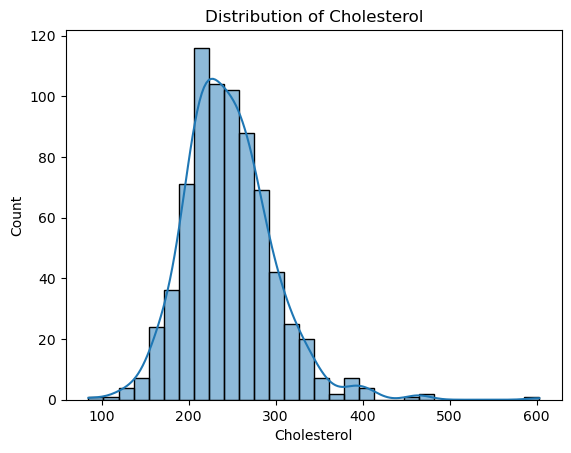

In [74]:
sns.histplot(data=train_set3, x="Cholesterol", bins=30, kde=True)
plt.title("Distribution of Cholesterol")
plt.show()

now let's check's its correlation with output variable.

In [75]:
chol_corr = train_set3.corr(numeric_only=True)
chol_corr["HeartDisease"].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.422740
Age             0.299410
FastingBS       0.259565
RestingBP       0.138611
Cholesterol     0.089785
MaxHR          -0.414676
Name: HeartDisease, dtype: float64

Earlier with "0" correlation with HeartDisease was -0.3 but now it is 0.08. So we can say that imputing the values has improved the correlation but still it is not much correlated to output variable. But let's keep it for now.

now let's tackle FastingBS

In [76]:
train_set3["FastingBS"].value_counts()

0    567
1    167
Name: FastingBS, dtype: int64

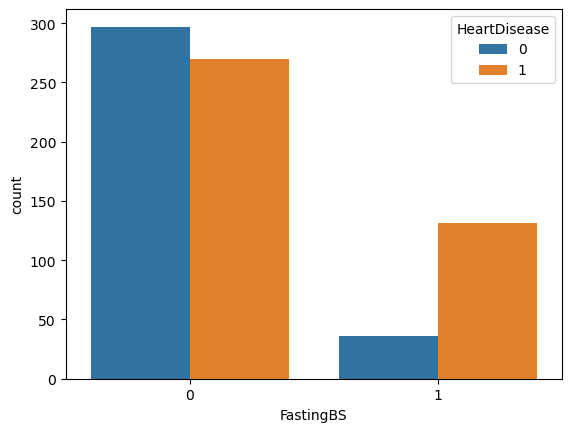

In [77]:
sns.countplot(data=train_set3, x="FastingBS", hue="HeartDisease")
plt.show()

Those who have fasting bs > 120 are more prone to heart disease.

Now let's tackle RestingECG

In [78]:
train_set3["RestingECG"].value_counts()

Normal    444
LVH       149
ST        141
Name: RestingECG, dtype: int64

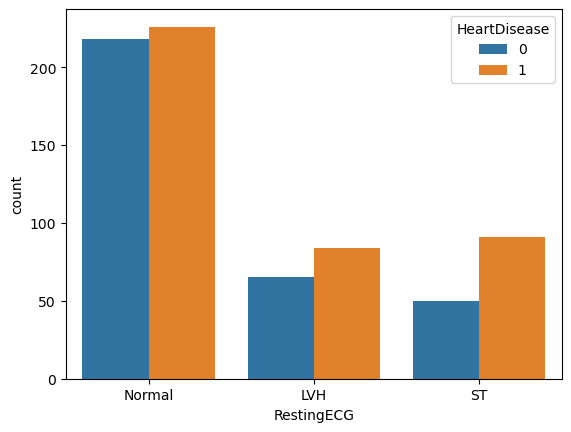

In [79]:
sns.countplot(data=train_set3, x="RestingECG", hue="HeartDisease")
plt.show()

Count of heart patient and normal patient is more in each category. But we can see that ST category has more heart disease cases as compared to other two. In normal and LVH, both heart patient and normal patient count is almost same. So ig it is not good to say give general statement.

/home/dell/anaconda3/envs/latest/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


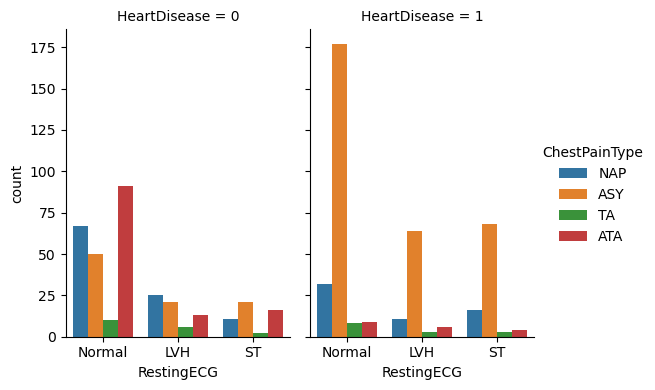

In [80]:
sns.catplot(data=train_set3, x="RestingECG", hue="ChestPainType", col="HeartDisease", kind="count", height=4, aspect=.7)
plt.show()

Can say that All three RestingECG categories have paitents who has ASY chest pain. But there are lot many people with Normal ECG who has ASY chest pain and having heart disease. So something is not fitting properly.

Now let's tackle MaxHr

In [81]:
train_set3["MaxHR"].min(), train_set3["MaxHR"].max()

(60, 202)

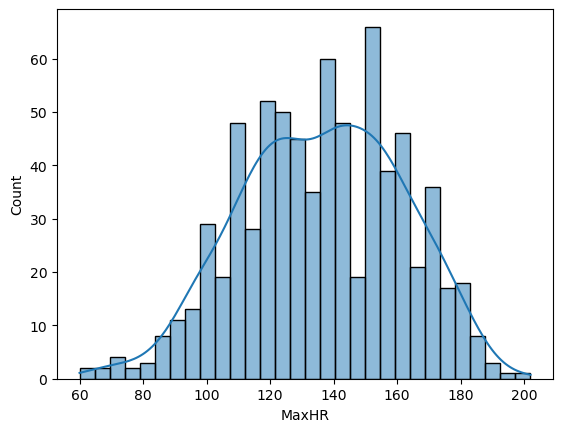

In [82]:
sns.histplot(data=train_set3, x="MaxHR", bins=30, kde=True)
plt.show()

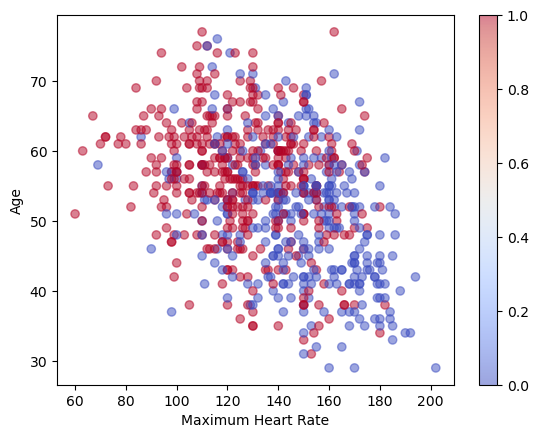

In [83]:
plt.scatter(data=train_set3, x="MaxHR", y="Age", c="HeartDisease", cmap="coolwarm", label="Heart Disease", alpha=0.5)
plt.colorbar()
plt.xlabel("Maximum Heart Rate")
plt.ylabel("Age")
plt.show()

HearDiesase patients are of middle age group and they have max heart rate achieved between 150-170. So we can say that people with max heart rate achieved between 60-160 are more prone to heart disease. Above 160, there are very few heart disease cases.

now its time to tackle ExerciseAngina

In [84]:
train_set3.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_Cat,RestingBP_Cat
795,42,M,NAP,120,240,1,Normal,194,N,0.8,Down,0,Middle,PreHypertenstion
25,36,M,NAP,130,209,0,Normal,178,N,0.0,Up,0,Young,PreHypertenstion
84,56,M,ASY,150,213,1,Normal,125,Y,1.0,Flat,1,Middle,High BP-1
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0,Young,PreHypertenstion
344,51,M,ASY,120,239,1,Normal,104,N,0.0,Flat,1,Middle,PreHypertenstion


In [85]:
train_set3["ExerciseAngina"].value_counts()

N    431
Y    303
Name: ExerciseAngina, dtype: int64

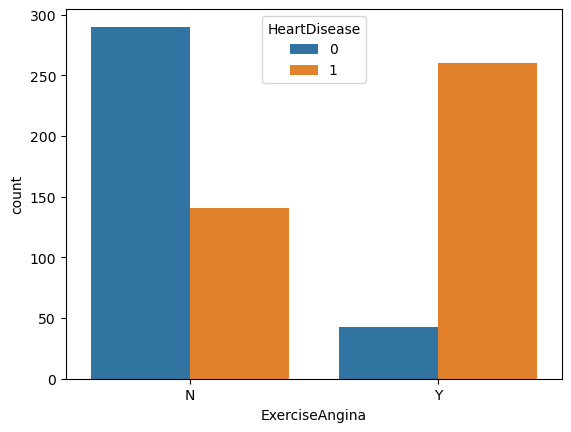

In [86]:
sns.countplot(data=train_set3, x="ExerciseAngina", hue="HeartDisease")
plt.show()

Those who have exercise angina are more prone to heart disease.

Now it time to tackle Oldpeak. Note this is the only feature is highly positively correlated to the output variable.
So it is worth exploring this feature.

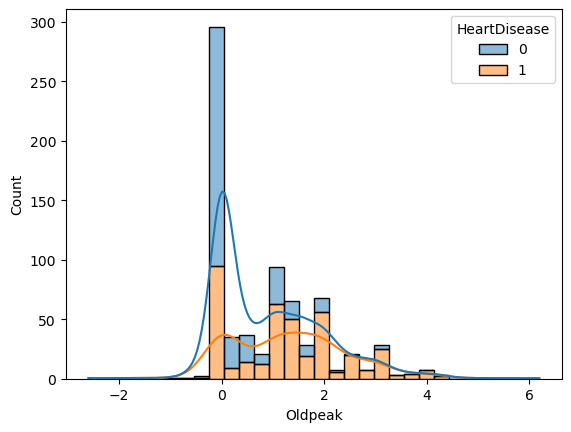

In [87]:
sns.histplot(data=train_set3, x="Oldpeak", bins=30, kde=True, hue="HeartDisease", multiple="stack")
plt.show()

ST_Slope time it is

In [88]:
train_set3["ST_Slope"].value_counts()

Flat    379
Up      307
Down     48
Name: ST_Slope, dtype: int64

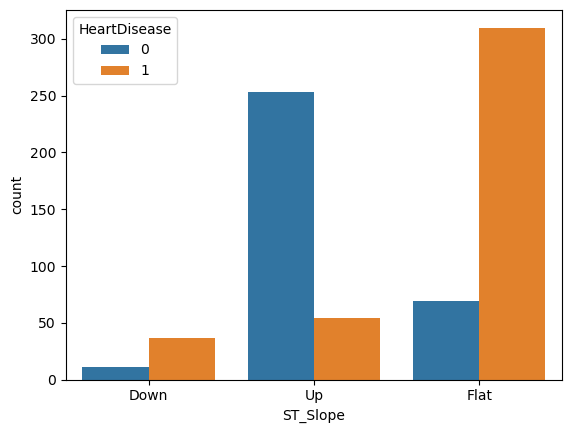

In [89]:
sns.countplot(data=train_set3, x="ST_Slope", hue="HeartDisease")
plt.show()

down and flat slope has more heart disease cases as compared to up slope.

Done with basic EDA. Now let's move to model building.

#### Preparing data for model

In [90]:
train_set_final =  train_set3.copy()
test_set_final = test_set.copy()

In [91]:
train_set_final.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_Cat,RestingBP_Cat
795,42,M,NAP,120,240,1,Normal,194,N,0.8,Down,0,Middle,PreHypertenstion
25,36,M,NAP,130,209,0,Normal,178,N,0.0,Up,0,Young,PreHypertenstion
84,56,M,ASY,150,213,1,Normal,125,Y,1.0,Flat,1,Middle,High BP-1
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0,Young,PreHypertenstion
344,51,M,ASY,120,239,1,Normal,104,N,0.0,Flat,1,Middle,PreHypertenstion


In [92]:
# let's drop last two columns as they were just for data analysis
train_set_final.drop(["Age_Cat", "RestingBP_Cat"], axis=1, inplace=True)
train_set_final.head()    

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
795,42,M,NAP,120,240,1,Normal,194,N,0.8,Down,0
25,36,M,NAP,130,209,0,Normal,178,N,0.0,Up,0
84,56,M,ASY,150,213,1,Normal,125,Y,1.0,Flat,1
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0
344,51,M,ASY,120,239,1,Normal,104,N,0.0,Flat,1


In [93]:
train_set_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 795 to 102
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             734 non-null    int64  
 1   Sex             734 non-null    object 
 2   ChestPainType   734 non-null    object 
 3   RestingBP       734 non-null    int64  
 4   Cholesterol     734 non-null    int64  
 5   FastingBS       734 non-null    int64  
 6   RestingECG      734 non-null    object 
 7   MaxHR           734 non-null    int64  
 8   ExerciseAngina  734 non-null    object 
 9   Oldpeak         734 non-null    float64
 10  ST_Slope        734 non-null    object 
 11  HeartDisease    734 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 74.5+ KB


#### seperating features and labels

In [94]:
heart_features = train_set_final.drop("HeartDisease", axis=1)
heart_labels = train_set_final["HeartDisease"]

In [121]:
x_test = test_set_final.drop("HeartDisease", axis=1)
y_test = test_set_final["HeartDisease"]

In [95]:
heart_features.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,M,NAP,120,240,1,Normal,194,N,0.8,Down
25,36,M,NAP,130,209,0,Normal,178,N,0.0,Up
84,56,M,ASY,150,213,1,Normal,125,Y,1.0,Flat
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up
344,51,M,ASY,120,239,1,Normal,104,N,0.0,Flat


In [96]:
heart_labels.head()

795    0
25     0
84     1
10     0
344    1
Name: HeartDisease, dtype: int64

##### handling categorical data

In [97]:
heart_features_1 = heart_features.copy()

In [98]:
heart_features_1.select_dtypes("object")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
795,M,NAP,Normal,N,Down
25,M,NAP,Normal,N,Up
84,M,ASY,Normal,Y,Flat
10,F,NAP,Normal,N,Up
344,M,ASY,Normal,N,Flat
...,...,...,...,...,...
106,F,ASY,ST,N,Up
270,M,ASY,Normal,N,Up
860,M,ASY,Normal,Y,Up
435,M,ASY,ST,Y,Up


In [99]:
cat_heart_features = heart_features_1.select_dtypes("object").columns.values
cat_heart_features

array(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
      dtype=object)

In [102]:
from sklearn.preprocessing import OneHotEncoder

cat_features_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded_arr = cat_features_encoder.fit_transform(heart_features_1[cat_heart_features])

In [104]:
one_hot_encoded_arr

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [105]:
one_hot_encoded_arr.shape

(734, 14)

In [106]:
cat_features_encoder.categories_

[array(['F', 'M'], dtype=object),
 array(['ASY', 'ATA', 'NAP', 'TA'], dtype=object),
 array(['LVH', 'Normal', 'ST'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['Down', 'Flat', 'Up'], dtype=object)]

In [108]:
# let's get the column names of the one hot encoded features

cat_features_encoder.get_feature_names_out(cat_heart_features)

array(['Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat',
       'ST_Slope_Up'], dtype=object)

In [110]:
# now we have encoed data , we can convert it to df, and then we will concatenate it
one_hot_encoded_df = pd.DataFrame(one_hot_encoded_arr, columns=cat_features_encoder.get_feature_names_out(cat_heart_features))
one_hot_encoded_df.head()

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [113]:
num_heart_features = heart_features_1.select_dtypes("number")
num_heart_features.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
795,42,120,240,1,194,0.8
25,36,130,209,0,178,0.0
84,56,150,213,1,125,1.0
10,37,130,211,0,142,0.0
344,51,120,239,1,104,0.0


In [114]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
num_heart_features_scaled = std_scaler.fit_transform(num_heart_features)
num_heart_features_scaled

array([[-1.24506731, -0.70898547, -0.11849821,  1.84260945,  2.28435288,
        -0.09706109],
       [-1.8862362 , -0.16628515, -0.71608423, -0.5427086 ,  1.65224147,
        -0.83628643],
       [ 0.25099346,  0.91911549, -0.63897636,  1.84260945, -0.44162756,
         0.08774524],
       ...,
       [ 0.67843939, -0.16628515,  0.13210239, -0.5427086 ,  0.30900473,
         0.45735791],
       [ 0.67843939,  1.02765555, -0.63897636, -0.5427086 , -0.7181763 ,
        -0.83628643],
       [-1.45879027,  0.91911549,  2.81160103, -0.5427086 , -0.24409275,
         1.01177691]])

In [115]:
num_heart_features_scaled_df = pd.DataFrame(num_heart_features_scaled, columns=num_heart_features.columns)
num_heart_features_scaled_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,-1.245067,-0.708985,-0.118498,1.842609,2.284353,-0.097061
1,-1.886236,-0.166285,-0.716084,-0.542709,1.652241,-0.836286
2,0.250993,0.919115,-0.638976,1.842609,-0.441628,0.087745
3,-1.779375,-0.166285,-0.677530,-0.542709,0.229991,-0.836286
4,-0.283314,-0.708985,-0.137775,1.842609,-1.271274,-0.836286


In [116]:
num_heart_features_scaled_df.shape, one_hot_encoded_df.shape

((734, 6), (734, 14))

Number of rows for both are same. So we can now concatenate

In [117]:
heart_features_final = pd.concat([num_heart_features_scaled_df, one_hot_encoded_df], axis=1)
heart_features_final.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.245067,-0.708985,-0.118498,1.842609,2.284353,-0.097061,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.886236,-0.166285,-0.716084,-0.542709,1.652241,-0.836286,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.250993,0.919115,-0.638976,1.842609,-0.441628,0.087745,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.779375,-0.166285,-0.677530,-0.542709,0.229991,-0.836286,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.283314,-0.708985,-0.137775,1.842609,-1.271274,-0.836286,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [144]:
heart_features_final.shape

(734, 20)

TODO Later:

- Create pipeline
  
Steps to be added in pipeline
- OneHotEncoding
- Scaling
- Concatenating the columns (both one hot encoded and numeric columns)

#### Model training

##### 1. Logistic Regression

In [118]:
heart_features_final.shape, heart_labels.shape

((734, 20), (734,))

In [119]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(heart_features_final, heart_labels)

LogisticRegression()

In [127]:
new = x_test.iloc[0]
new

Age                   63
Sex                    F
ChestPainType        ATA
RestingBP            140
Cholesterol          195
FastingBS              0
RestingECG        Normal
MaxHR                179
ExerciseAngina         N
Oldpeak              0.0
ST_Slope              Up
Name: 668, dtype: object

In [128]:
testing_pipline_data = x_test.copy()
testing_pipline_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
668,63,F,ATA,140,195,0,Normal,179,N,0.0,Up
30,53,M,NAP,145,518,0,Normal,130,N,0.0,Flat
377,65,M,ASY,160,234,1,ST,122,N,1.2,Flat
535,56,M,ASY,130,275,0,LVH,122,Y,1.0,Flat
807,54,M,ATA,108,309,0,Normal,156,N,0.0,Up


before prediction i guess i need to make pipeline, else it will be difficult to proceed further. 

In [129]:
from sklearn.pipeline import Pipeline

In [130]:
num_pipline = Pipeline([
    ("std-scaler", StandardScaler())
])

In [131]:
testing_num_features_tr = num_pipline.fit_transform(testing_pipline_data.select_dtypes("number"))
testing_num_features_tr

array([[ 1.03813138,  0.55273687, -0.71523836, -0.5857181 ,  1.53637764,
        -0.82051766],
       [ 0.0050531 ,  0.82193641,  4.29513953, -0.5857181 , -0.36115398,
        -0.82051766],
       [ 1.24474703,  1.62953502, -0.11027013,  1.70730595, -0.67095506,
         0.38487355],
       ...,
       [ 1.14143921,  0.60657678,  0.04484993,  1.70730595, -0.90330586,
         0.68622135],
       [-0.40817821,  0.0143378 ,  0.38611406, -0.5857181 ,  1.22657656,
        -0.21782205],
       [ 1.14143921,  0.7680965 ,  0.57225813, -0.5857181 , -0.67095506,
         0.18397502]])

This is working fine

now let's create pipeline for categorical columns

In [132]:
cat_pipeline = Pipeline([
    ("encoder", OneHotEncoder(sparse_output=False))
])

let's test it out

In [133]:
testing_cat_features_tr = cat_pipeline.fit_transform(testing_pipline_data.select_dtypes("object"))
testing_cat_features_tr

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [135]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes_names):
        self.attributes_names = attributes_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attributes_names]

In [136]:
num_attr = heart_features_1.select_dtypes("number").columns.values
cat_attr = heart_features_1.select_dtypes("object").columns.values

In [139]:
from sklearn.pipeline import FeatureUnion

In [140]:
num_pipeline = Pipeline([
    ("selector", DataFrameSelector(num_attr)),
    ("std_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("selector", DataFrameSelector(cat_attr)),
    ("encoder", OneHotEncoder(sparse_output=False))
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [141]:
wohoo = full_pipeline.fit_transform(heart_features_1)

In [143]:
wohoo.shape

(734, 20)

In [145]:
heart_features_final.shape

(734, 20)

Working sexy!!

In [151]:
heart_features_final = full_pipeline.fit_transform(heart_features_1)
heart_features_final.shape

(734, 20)

In [152]:
lr = LogisticRegression()
lr.fit(heart_features_final, heart_labels)

LogisticRegression()

In [153]:
new = x_test.iloc[:1]
new 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
668,63,F,ATA,140,195,0,Normal,179,N,0.0,Up


In [154]:
new_tr = full_pipeline.transform(new)
new_tr

array([[ 0.99902384,  0.37641517, -0.9859618 , -0.5427086 ,  1.69174843,
        -0.83628643,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ]])

let's predict the values

In [155]:
lr.predict(new_tr)

array([0])

let's test the accuracy

In [158]:
x_test_tr = full_pipeline.transform(x_test)
x_test_tr.shape

(184, 20)

In [159]:
score = lr.score(x_test_tr, y_test)
print(score)

0.8641304347826086
